<a href="https://colab.research.google.com/github/Muntasir2179/tensorflow-learning/blob/neural-network-regression/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction to Regression with Neural Networks in TensorFlow

There are difinitions for a regression problem but in our case, we're going to simplify it: predicting a neumerical variable based on some other combination of variables, evem shorter...predicting a number.

In [1]:
# Import TensorFLow
import tensorflow as tf
print(tf.__version__)

2.12.0


## Creating data to view and fit

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

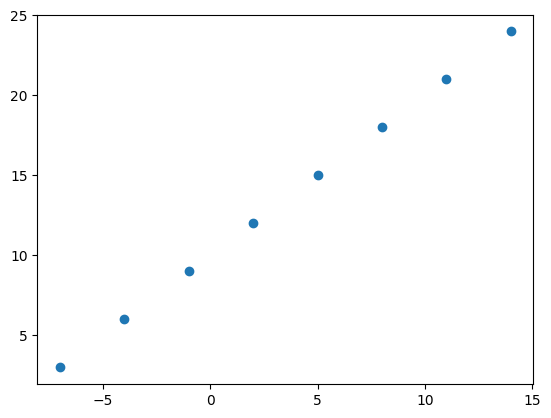

In [3]:
plt.scatter(X, y)

In [4]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and Output shapes

In [5]:
# let's create a demo tensor for our housing price prediction problem
house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [6]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [7]:
X = np.reshape(X, (-1, 1))
X

array([[-7.],
       [-4.],
       [-1.],
       [ 2.],
       [ 5.],
       [ 8.],
       [11.],
       [14.]])

In [8]:
# turn our NumPy array into tensor
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8, 1), dtype=float64, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

## Steps in modelling with TensorFlow

1. Creting a model - define the input and output layers, as well as the hidden layers of a deep learning model.
2. Compiling a model - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation matrics (what we can use to interpret the performance of our model).
3. Fitting a model - letting the model try to find patterns between X & y (features and labels).

In [9]:
tf.random.set_seed(42)

In [10]:
# create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
])

# compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# fit the model
model.fit(X, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 17.0434 - mae: 17.0434
Epoch 2/5
1/1 [==============================] - 0s 21ms/step - loss: 16.7621 - mae: 16.7621
Epoch 3/5
1/1 [==============================] - 0s 24ms/step - loss: 16.4809 - mae: 16.4809
Epoch 4/5
1/1 [==============================] - 0s 17ms/step - loss: 16.1996 - mae: 16.1996
Epoch 5/5
1/1 [==============================] - 0s 17ms/step - loss: 15.9184 - mae: 15.9184


## Getting prediction form the model

In [11]:
model.predict([17.0])

1/1 [==============================] - 0s 157ms/step


array([[-9.402401]], dtype=float32)

## Improving the model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - Here we might add more layers, increases the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling model** - Here we might change the optimization function or perhaps the learning rate of the optimization function.
3. **Fitting the model** - Here we might fit a model for more epochs (leave ot training for longer) or on more data (give the model more examples to learn from).

### Increasing number of epochs

In [12]:
# lets recreate the model
# Increasing the number of epochs
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
])

# compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# fit the model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 763ms/step - loss: 20.8299 - mae: 20.8299
Epoch 2/100
1/1 [==============================] - 0s 18ms/step - loss: 20.4652 - mae: 20.4652
Epoch 3/100
1/1 [==============================] - 0s 18ms/step - loss: 20.1840 - mae: 20.1840
Epoch 4/100
1/1 [==============================] - 0s 23ms/step - loss: 19.9027 - mae: 19.9027
Epoch 5/100
1/1 [==============================] - 0s 22ms/step - loss: 19.6215 - mae: 19.6215
Epoch 6/100
1/1 [==============================] - 0s 26ms/step - loss: 19.3402 - mae: 19.3402
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 19.0590 - mae: 19.0590
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 18.7777 - mae: 18.7777
Epoch 9/100
1/1 [==============================] - 0s 14ms/step - loss: 18.4965 - mae: 18.4965
Epoch 10/100
1/1 [==============================] - 0s 16ms/step - loss: 18.2152 - mae: 18.2152
Epoch 11/100
1/1 [==============================

In [13]:
# remind ourselves of the data
X, y

(<tf.Tensor: shape=(8, 1), dtype=float64, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [14]:
# let's see if our model's predictino has improved
model.predict([17.0])

1/1 [==============================] - 0s 133ms/step


array([[29.150229]], dtype=float32)

### Adding more hidden units with activation function

In [15]:
# redefining the model but this time we are adding more hidden units
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# fit the model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 10.6828 - mae: 10.6828
Epoch 2/100
1/1 [==============================] - 0s 15ms/step - loss: 10.1701 - mae: 10.1701
Epoch 3/100
1/1 [==============================] - 0s 25ms/step - loss: 9.6413 - mae: 9.6413
Epoch 4/100
1/1 [==============================] - 0s 20ms/step - loss: 9.0934 - mae: 9.0934
Epoch 5/100
1/1 [==============================] - 0s 19ms/step - loss: 8.5238 - mae: 8.5238
Epoch 6/100
1/1 [==============================] - 0s 18ms/step - loss: 7.9295 - mae: 7.9295
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 7.3588 - mae: 7.3588
Epoch 8/100
1/1 [==============================] - 0s 18ms/step - loss: 7.3400 - mae: 7.3400
Epoch 9/100
1/1 [==============================] - 0s 22ms/step - loss: 7.3212 - mae: 7.3212
Epoch 10/100
1/1 [==============================] - 0s 28ms/step - loss: 7.3024 - mae: 7.3024
Epoch 11/100
1/1 [==============================] - 0s 22ms/step - 

In [16]:
# remind ourselves of the data
X, y

(<tf.Tensor: shape=(8, 1), dtype=float64, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [17]:
# getting prediction from the model
model.predict([17.0])

1/1 [==============================] - 0s 183ms/step


array([[30.350973]], dtype=float32)

### Changing the optimizatino funciton

In [18]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['mae'])

# fit the model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 13.0748 - mae: 13.0748
Epoch 2/100
1/1 [==============================] - 0s 32ms/step - loss: 12.3992 - mae: 12.3992
Epoch 3/100
1/1 [==============================] - 0s 26ms/step - loss: 11.7235 - mae: 11.7235
Epoch 4/100
1/1 [==============================] - 0s 26ms/step - loss: 11.0455 - mae: 11.0455
Epoch 5/100
1/1 [==============================] - 0s 26ms/step - loss: 10.3634 - mae: 10.3634
Epoch 6/100
1/1 [==============================] - 0s 23ms/step - loss: 9.6751 - mae: 9.6751
Epoch 7/100
1/1 [==============================] - 0s 27ms/step - loss: 8.9781 - mae: 8.9781
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 8.2698 - mae: 8.2698
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 7.5476 - mae: 7.5476
Epoch 10/100
1/1 [==============================] - 0s 17ms/step - loss: 6.8085 - mae: 6.8085
Epoch 11/100
1/1 [==============================] - 0s 21ms/s

In [19]:
model.predict([17.0])

1/1 [==============================] - 0s 120ms/step


array([[26.989664]], dtype=float32)

**🧮🔑Important🔑🧮:** Common ways to improve a deep learning model

*   Adding layers.
*   Increase the number of hidden units.
*   Change the activation function.
*   Change the optimizatino function.
*   Change the learning rate.
*   Fitting on more data.



### Adding more data

It is good idea to visualize:

*  The data - What data are we working with? What does it look like?
*  The model itself - What does our model look like?
*  The training of a model - How does a model performs while it learns?
*  The predictions of the model - How do the prediction of the model line up against the ground truth (the original labels).

In [20]:
# making a bigger dataset
features = tf.range(-100, 100, 4)
labels = features + 10
features, labels

(<tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96], dtype=int32)>,
 <tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

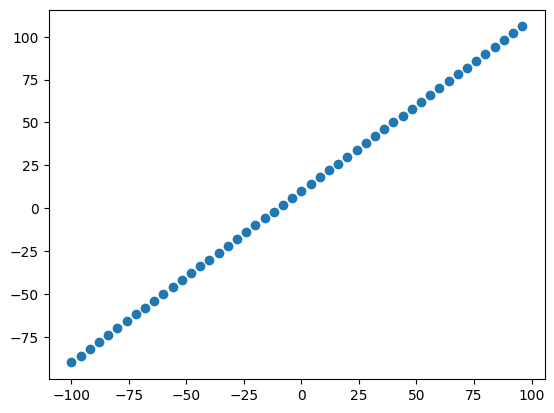

In [21]:
plt.scatter(features, labels)

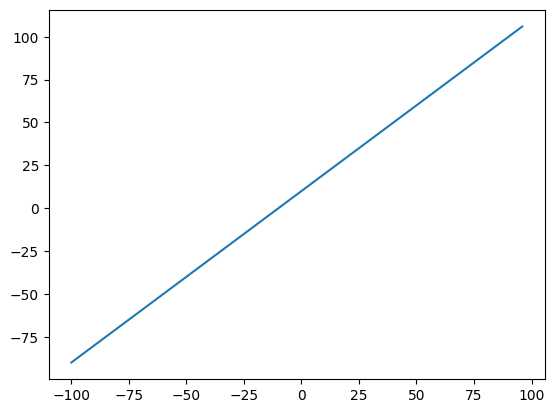

In [22]:
plt.plot(features, labels)

In [23]:
features = tf.reshape(features, shape=(50,1))
features

<tf.Tensor: shape=(50, 1), dtype=int32, numpy=
array([[-100],
       [ -96],
       [ -92],
       [ -88],
       [ -84],
       [ -80],
       [ -76],
       [ -72],
       [ -68],
       [ -64],
       [ -60],
       [ -56],
       [ -52],
       [ -48],
       [ -44],
       [ -40],
       [ -36],
       [ -32],
       [ -28],
       [ -24],
       [ -20],
       [ -16],
       [ -12],
       [  -8],
       [  -4],
       [   0],
       [   4],
       [   8],
       [  12],
       [  16],
       [  20],
       [  24],
       [  28],
       [  32],
       [  36],
       [  40],
       [  44],
       [  48],
       [  52],
       [  56],
       [  60],
       [  64],
       [  68],
       [  72],
       [  76],
       [  80],
       [  84],
       [  88],
       [  92],
       [  96]], dtype=int32)>

In [24]:
# split the data into train and test set
x_train = features[:40, :1]
y_train = labels[:40]

x_test = features[40:, :1]
y_test = labels[40:]

In [25]:
len(x_train), len(x_test), len(y_train), len(y_test)

(40, 10, 40, 10)

## Visualizing the data

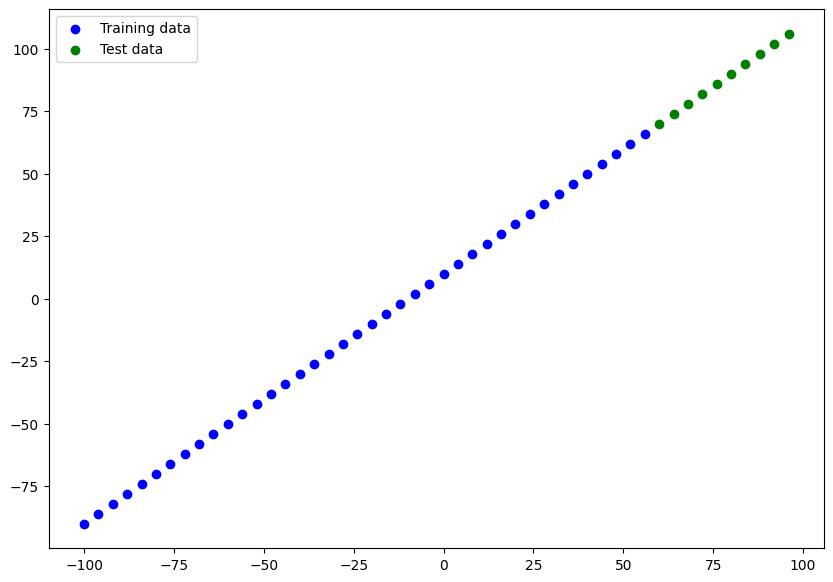

In [26]:
plt.figure(figsize=(10, 7))
# plot training data in blue
plt.scatter(x_train, y_train, c='b', label='Training data')
# plot test data
plt.scatter(x_test, y_test, c='g', label='Test data')
# show the legend
plt.legend()

## Training a neural network

In [27]:
tf.shape(x_train)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([40,  1], dtype=int32)>

In [28]:
# build the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name='input_layer'),
    tf.keras.layers.Dense(1, name='output_layer')
], name='neural_network')

# compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

In [29]:
model.summary()

Model: "neural_network"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


🧮🔑**Note:**🔑🧮
*  Total params: Total number of parameters in the model.
*  Trainable parameters: These are the parameters (paterns) the model can update as it trains.
*  Non-trainable params: These parameters aren't updated during training (this is typical when you bring in already learn patterns or parameters from other models during **Transfer Learning**).


**Complete details about trainable parameters within a layer:**

📖**Resource:** [https://www.youtube.com/watch?v=njKP3FqW3Sk&list=PLHkKmgGGVneX2BzZVYGqcWbFw_7ymcZqv](https://www.youtube.com/watch?v=njKP3FqW3Sk&list=PLHkKmgGGVneX2BzZVYGqcWbFw_7ymcZqv)

In [30]:
# fit the model
model.fit(x_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 9ms/step - loss: 26.2834 - mae: 26.2834
Epoch 2/100
2/2 [==============================] - 0s 10ms/step - loss: 24.6415 - mae: 24.6415
Epoch 3/100
2/2 [==============================] - 0s 10ms/step - loss: 30.5290 - mae: 30.5290
Epoch 4/100
2/2 [==============================] - 0s 11ms/step - loss: 24.4359 - mae: 24.4359
Epoch 5/100
2/2 [==============================] - 0s 11ms/step - loss: 14.5036 - mae: 14.5036
Epoch 6/100
2/2 [==============================] - 0s 12ms/step - loss: 11.5584 - mae: 11.5584
Epoch 7/100
2/2 [==============================] - 0s 12ms/step - loss: 10.9138 - mae: 10.9138
Epoch 8/100
2/2 [==============================] - 0s 11ms/step - loss: 10.9978 - mae: 10.9978
Epoch 9/100
2/2 [==============================] - 0s 14ms/step - loss: 39.2366 - mae: 39.2366
Epoch 10/100
2/2 [==============================] - 0s 15ms/step - loss: 26.7856 - mae: 26.7856
Epoch 11/100
2/2 [==============================] 

## Evaluating model

In [31]:
from tensorflow.keras.utils import plot_model

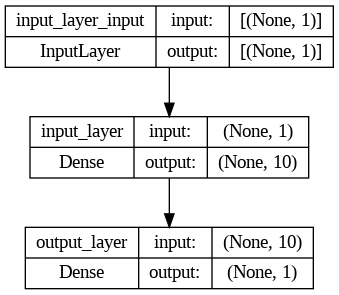

In [32]:
plot_model(model, show_shapes=True)

### Visualizing our models predictions

In [33]:
# make some prediction
y_pred = model.predict(x_test)
y_pred

1/1 [==============================] - 0s 183ms/step


array([[ 76.464226],
       [ 81.44649 ],
       [ 86.42876 ],
       [ 91.411026],
       [ 96.39329 ],
       [101.37556 ],
       [106.35782 ],
       [111.34007 ],
       [116.32234 ],
       [121.30461 ]], dtype=float32)

In [34]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [35]:
# let's create a ploting function
def plot_prediction(train_data=x_train, train_labels=y_train, test_data=x_test, test_labels=y_test, predictions=y_pred):
  """
  Plots training data, test data and compares predictions to ground truth labels.
  """
  plt.figure(figsize=(10, 7))
  # plot training data in blue
  plt.scatter(train_data, train_labels, c='b', label='Training data')
  # plot testing data in green
  plt.scatter(test_data, test_labels, c='g', label='Testing data')
  # plot models prediction in red
  plt.scatter(test_data, predictions, c='r', label='Predictions')
  # show legend
  plt.legend()

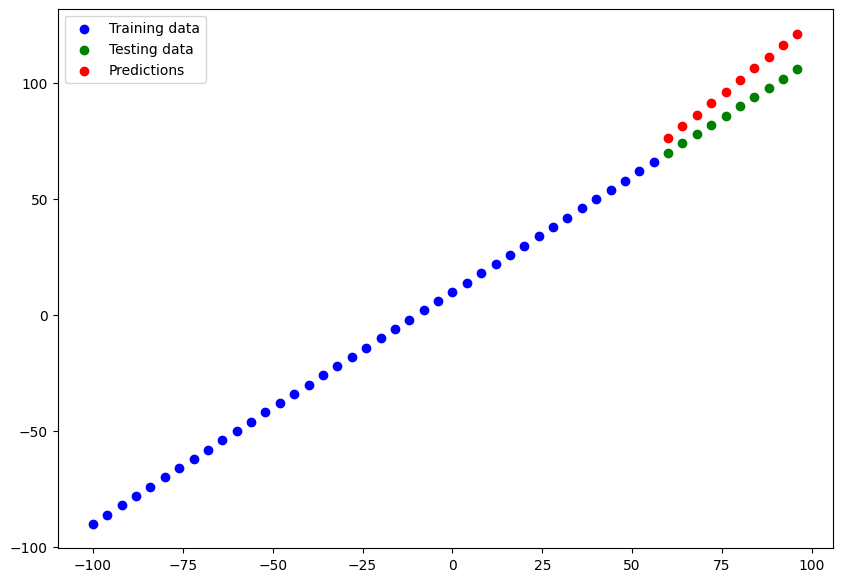

In [36]:
plot_prediction()

### Evaluating models predictions with regression evaluation metrics

Depending on the problem we're working on, there will be different evaluation metrics to evaluate our model.

Since we're working on a regression problem, there are two main metrics:

*  MAE - mean absolute error, "on average, how wrong is each of my model's prediction"
*  MSE - mean square error, "square the average errors"

In [37]:
# evaluate the model on the test set
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 248ms/step - loss: 10.8844 - mae: 10.8844


[10.884415626525879, 10.884415626525879]

In [38]:
# converting y_pred into tensor
y_pred = tf.constant(y_pred)
y_pred

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 76.464226],
       [ 81.44649 ],
       [ 86.42876 ],
       [ 91.411026],
       [ 96.39329 ],
       [101.37556 ],
       [106.35782 ],
       [111.34007 ],
       [116.32234 ],
       [121.30461 ]], dtype=float32)>

In [39]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [40]:
# as the shapes of y_test and y_pred is different we have to change the shape of y_pred into (10,)
y_pred = tf.squeeze(y_pred)
y_pred

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 76.464226,  81.44649 ,  86.42876 ,  91.411026,  96.39329 ,
       101.37556 , 106.35782 , 111.34007 , 116.32234 , 121.30461 ],
      dtype=float32)>

In [41]:
y_pred.shape, y_test.shape

(TensorShape([10]), TensorShape([10]))

In [42]:
# calculate the mean absolute error
mae = tf.losses.MAE(y_test, y_pred)
mae

<tf.Tensor: shape=(), dtype=float32, numpy=10.8844185>

In [43]:
# calcualte the mean squared error
mse = tf.losses.MSE(y_test, y_pred)
mse

<tf.Tensor: shape=(), dtype=float32, numpy=126.43053>

In [78]:
# making a function to use MAE and MSE
def mae(y_true, y_pred):
  return tf.losses.MAE(y_true=y_test, y_pred=tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.losses.MSE(y_true=y_test, y_pred=tf.squeeze(y_pred))

## Running experiments to improve our model

### One layer with 100 epochs

In [45]:
# set random seed
tf.random.set_seed(42)

# creating a model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# compile the model
model_1.compile(loss=tf.losses.mae,
                optimizer=tf.optimizers.SGD(),
                metrics=['mae'])

# fit the model
model_1.fit(x_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 15ms/step - loss: 38.4885 - mae: 38.4885
Epoch 2/100
2/2 [==============================] - 0s 9ms/step - loss: 10.7785 - mae: 10.7785
Epoch 3/100
2/2 [==============================] - 0s 9ms/step - loss: 11.4230 - mae: 11.4230
Epoch 4/100
2/2 [==============================] - 0s 9ms/step - loss: 9.4958 - mae: 9.4958
Epoch 5/100
2/2 [==============================] - 0s 9ms/step - loss: 10.3929 - mae: 10.3929
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 9.6296 - mae: 9.6296
Epoch 7/100
2/2 [==============================] - 0s 9ms/step - loss: 8.7380 - mae: 8.7380
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 9.0655 - mae: 9.0655
Epoch 9/100
2/2 [==============================] - 0s 11ms/step - loss: 19.1572 - mae: 19.1572
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 10.3452 - mae: 10.3452
Epoch 11/100
2/2 [==============================] - 0s 8ms/step -

1/1 [==============================] - 0s 57ms/step


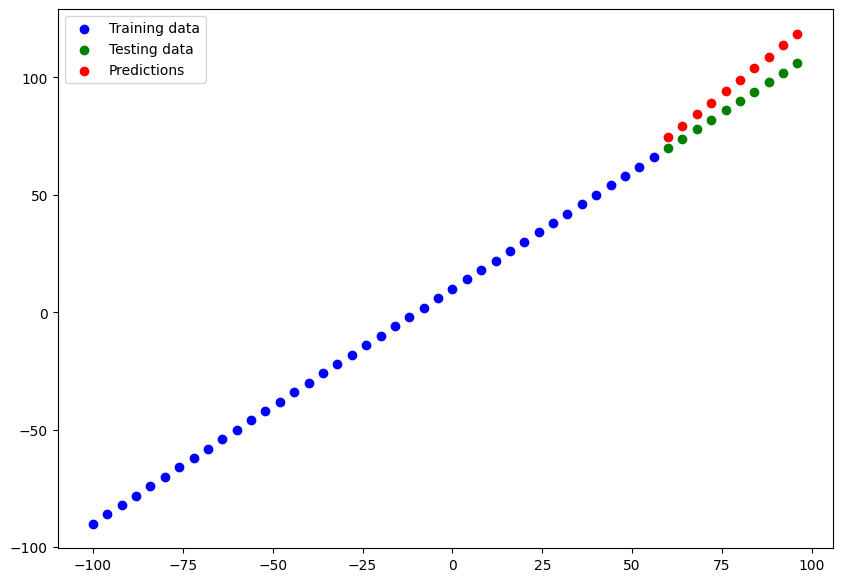

In [46]:
# make and plot predictions of our model
y_preds_1 = model_1.predict(x_test)
plot_prediction(predictions=y_preds_1)

In [47]:
# calculate model_1 evaluatino metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=8.591092>,
 <tf.Tensor: shape=(), dtype=float32, numpy=80.298805>)

### Two dense layers with 100 epochs

In [67]:
# set the random seed
tf.random.set_seed(42)

# creating the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# compile the model
model_2.compile(loss=tf.losses.mae,
                optimizer=tf.optimizers.SGD(),
                metrics=['mse'])

# fit the model
model_2.fit(x_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 12ms/step - loss: 13.5736 - mse: 348.2171
Epoch 2/100
2/2 [==============================] - 0s 9ms/step - loss: 21.9628 - mse: 777.5837
Epoch 3/100
2/2 [==============================] - 0s 9ms/step - loss: 19.7418 - mse: 575.2903
Epoch 4/100
2/2 [==============================] - 0s 11ms/step - loss: 14.2930 - mse: 271.7239
Epoch 5/100
2/2 [==============================] - 0s 9ms/step - loss: 20.0115 - mse: 546.7252
Epoch 6/100
2/2 [==============================] - 0s 9ms/step - loss: 8.1699 - mse: 91.6243
Epoch 7/100
2/2 [==============================] - 0s 9ms/step - loss: 17.1474 - mse: 376.2162
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 17.1319 - mse: 437.5057
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 30.1395 - mse: 1239.0159
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 11.8878 - mse: 195.1168
Epoch 11/100
2/2 [==============================

1/1 [==============================] - 0s 59ms/step


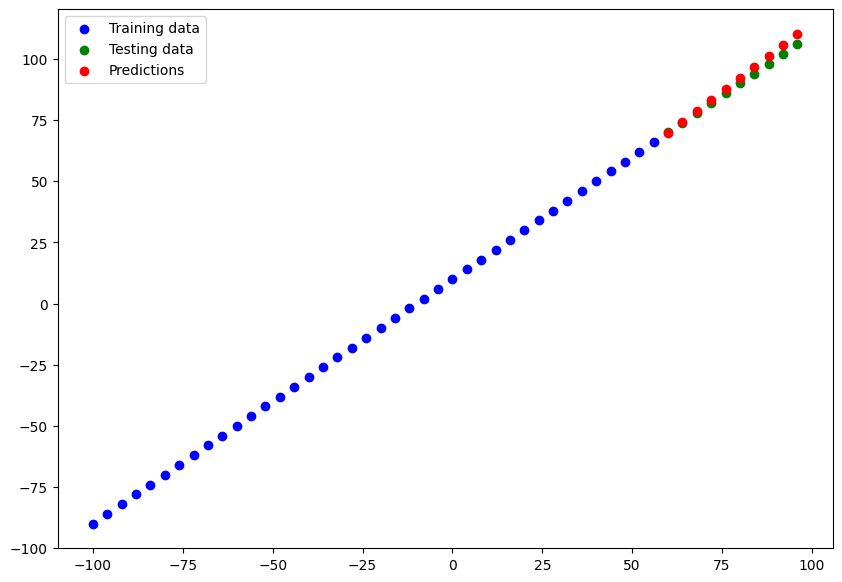

In [68]:
# making predictino and ploting results
y_preds_2 = model_2.predict(x_test)

# ploting the predictions
plot_prediction(predictions=y_preds_2)

In [69]:
# calculating the evaluation metrics
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=1.9949234>,
 <tf.Tensor: shape=(), dtype=float32, numpy=5.8892684>)

### Two layers with 500 epochs

In [51]:
# set the random seed
tf.random.set_seed(42)

# creating the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# compile the model
model_3.compile(loss=tf.losses.mae,
                optimizer=tf.optimizers.SGD(),
                metrics=['mse'])

# fit the model
model_3.fit(x_train, y_train, epochs=500, verbose=0)

1/1 [==============================] - 0s 98ms/step


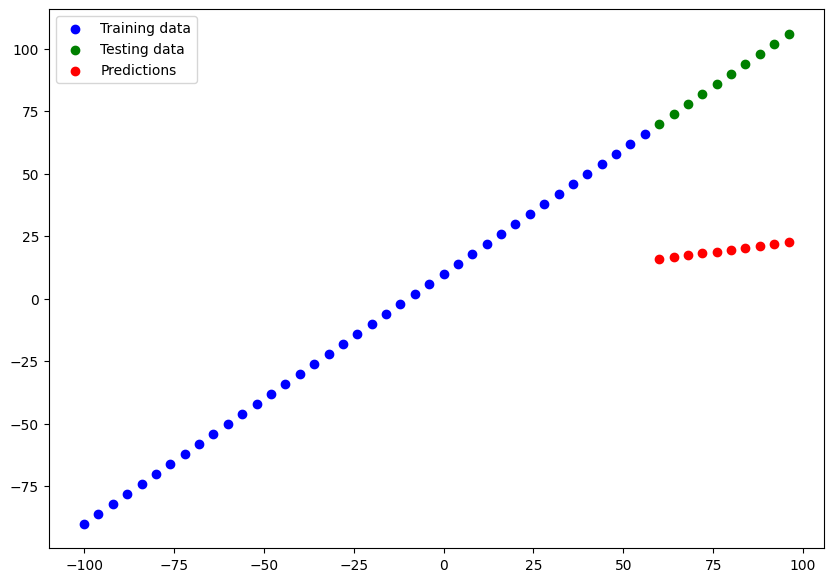

In [52]:
# making predictino and ploting results
y_preds_3 = model_3.predict(x_test)

# ploting the predictions
plot_prediction(predictions=y_preds_3)

In [53]:
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.718765>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4808.757>)

## Compareing the results of our experiments

In [72]:
import pandas as pd

model_results = [['model_1', mae_1.numpy(), mse_1.numpy()],
                 ['model_2', mae_2.numpy(), mse_2.numpy()],
                 ['model_3', mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=['model', 'mae', 'mse'])
all_results

,model,mae,mse
0,model_1,8.591092,80.298805
1,model_2,1.994923,5.889268
2,model_3,68.718765,4808.756836


**Tracking our experiments**

One really good habit in machine learning modelling is to track the results of our experiments.
Luckily, there are tools to help us!

📖**Resource:** As we build more models, we will want to look into using:
*   TensorBoard - A component of the tensorFlow library to help track modelling experiments (we'll see this one later).
*   Weights & Biases - a tool for tracking all kinds of machine learning experiments (plugs straight into TensorBoard).

## Saving trained model

Saving our model allows up to use them outside of Google Colab (or wherever they were trained)

There are two main format we can save our models:
*   The SavedModel format.
*   The HDF5 format.



In [74]:
# saving model using the SavedModel format
model_2.save('best_model_SaveModel_format')

In [75]:
# saving model using the HDF5 format
model_2.save('best_model_HDF5_format.h5')

## loading in a saved model

### SavedModel format

In [76]:
# load in the SavedModel format model
loaded_SavedModel_format = tf.keras.models.load_model('best_model_SaveModel_format')
loaded_SavedModel_format.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 10)                20        
                                                                 
 dense_24 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [81]:
# compare model_2 predictions with SavedModel format model predictions
model_2_preds = model_2.predict(x_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(x_test)

# comparing the MAE score
(mae(y_true=y_test, y_pred=model_2_preds) == mae(y_true=y_test, y_pred=loaded_SavedModel_format_preds)).numpy()

1/1 [==============================] - 0s 49ms/step


True

In [83]:
model_2_preds == loaded_SavedModel_format_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

### HDF5 format

In [85]:
# load in the HDF5 format model
loaded_HDF5_format = tf.keras.models.load_model('best_model_HDF5_format.h5')
loaded_HDF5_format.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 10)                20        
                                                                 
 dense_24 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [86]:
# compare model_2 predictions with HDF5 format model predictions
model_2_preds = model_2.predict(x_test)
loaded_HDF5_format_preds = loaded_HDF5_format.predict(x_test)

# comparing the MAE score
(mae(y_true=y_test, y_pred=model_2_preds) == mae(y_true=y_test, y_pred=loaded_HDF5_format_preds)).numpy()

1/1 [==============================] - 0s 57ms/step


True

In [87]:

model_2_preds == loaded_HDF5_format_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])